#### Implementation d'un perceptron multicouche de ZERO !

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Definition du réseau et initialisation des poids

In [36]:
# Initialisation des poids et des biais...
def initialisation_des_poids():
    Wc = np.random.normal(0, 0.1, (4, 2))
    bc = np.zeros((4, 1))
    Ws = np.random.normal(0, 0.1, (4, 1))
    bs = np.zeros((1, 1))

    return Wc, bc, Ws, bs

In [22]:
# Fonction pour charger les données XOR
def load_xor():
    train = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
    test = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
    return np.array(train, dtype='float64'), np.array(test, dtype='float64')

In [10]:
# Fonction d'activation ReLU pour la couche cachée
def ReLU(Z):
    return np.maximum(0, Z)

In [11]:
# La dérivée de la fonction ReLU pour la retropropagation
def dReLU(Z):
    return np.where(Z > 0, 1.0, 0.0)

In [12]:
# Fonction sigmoïde pour la couche de sortie (prédiction) vus que c'est une classification binaire
def sigmoide(Z):
    return 1 / (1 + np.exp(-Z))

In [13]:
# Pour dessiner notre courbe d'apprentissage
def dessiner_courbe_dapprentissage(erreurs):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(erreurs)), erreurs)
    plt.ylim(0, 1)
    plt.xlim(0, len(erreurs)-1)
    plt.xlabel("Itérations")
    plt.ylabel("Erreurs")
    plt.show()


##### 2. Propagation avant (forward propagtion)

In [29]:
# En fait la propagation avant nous permet de calculer la prediction de note modele
def propagation_avant(X, Wc, bc, Ws, bs):
    Zc = np.dot(Wc, X) + bc
    H = ReLU(Zc)
    Zs = np.dot(Ws.T, H) + bs
    Ypred = sigmoide(Zs)

    return Zc, H, Ypred

##### 3. Calcul de la perte L

In [17]:
# La fonction de perte L binaire croisée pour la classification binaire particulierement
def L(Ypred, Ytrue):
    return -np.mean(Ytrue * np.log(Ypred + 1e-9) + (1 - Ytrue) * np.log(1 - Ypred + 1e-9))

##### 4. Propagation arriere (Backwardpropagation)

In [25]:
# La retropropagation pour calculer les gradients afin de mettre à jour les poids et les biais
def propagation_arriere(Ypred, Ytrue, Zc, X, H, Ws):
    dZs = Ypred - Ytrue
    dWs = np.dot(H, dZs.T) / X.shape[1]
    dbs = np.sum(dZs, axis=1, keepdims=True) / X.shape[1]

    
    dH = np.dot(Ws, dZs)
    dZc = dH * dReLU(Zc)
    dWc = np.dot(dZc, X.T) / X.shape[1]
    dbc = np.sum(dZc, axis=1, keepdims=True) / X.shape[1]

    return dWc, dbc, dWs, dbs

##### 5. Mise à jour des poids et des biais

In [26]:
def mise_a_jour(Wc, bc, Ws, bs, dWc, dbc, dWs, dbs, lr):
    Wc = Wc - lr*dWc
    bc = bc - lr*dbc

    Ws = Ws - lr*dWs
    bs = bs - lr*dbs

    return Wc, bc, Ws, bs

In [ ]:
# Pour calculer accuracy de notre modele.
def calculer_exactitude(Ypred, Ytrue):
    # Appliquer un seuil de 0.5 pour obtenir des prédictions binaires
    Ypred_binaire = (Ypred >= 0.5).astype(int)  # Convertir les prédictions en 0 ou 1

    # Comparer les prédictions avec les valeurs réelles
    # Ypred_binaire et Ytrue doivent avoir la même forme pour effectuer la comparaison
    exactitude = np.mean(Ypred_binaire == Ytrue) 
    return exactitude

In [82]:
# Apprentissage du modele 
def apprentissage(X, Y, iterations, lr):
    Wc, bc, Ws, bs = initialisation_des_poids()
    erreurs = []
    outYpred = 0.0

    for i in range(iterations):
        Zc, H, Ypred = propagation_avant(X, Wc, bc, Ws, bs)
        outYpred = Ypred

        erreur = L(Ypred, Y)
        erreurs.append(erreur)

        dWc, dbc, dWs, dbs = propagation_arriere(Ypred, Y, Zc, X, H, Ws)
        Wc, bc, Ws, bs = mise_a_jour(Wc, bc, Ws, bs, dWc, dbc, dWs, dbs, lr)

    dessiner_courbe_dapprentissage(erreurs)
    print(f"Exactitude : {calculer_exactitude(Ypred, Y) * 100}%")
    return Wc, bc, Ws, bs

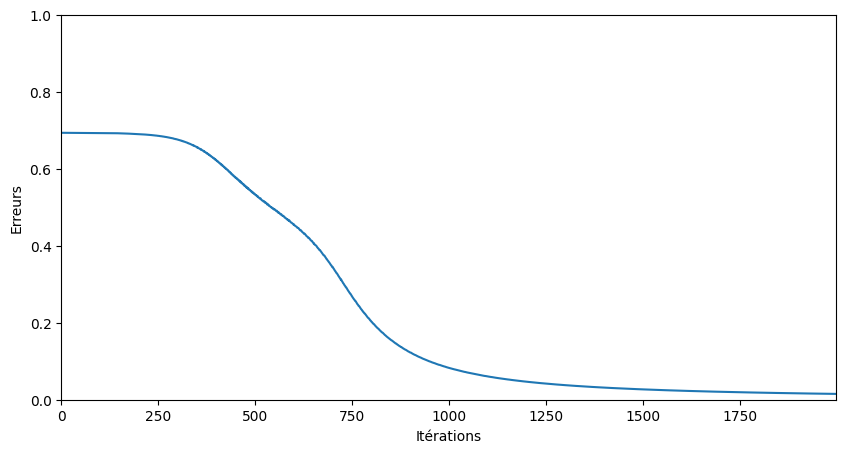

Exactitude : 100.0%


In [84]:
train, test = load_xor()
X = train[:, :2].T
Y = train[:, 2:].T

Wc, bc, Ws, bs = apprentissage(X, Y, 2000, 0.1)

In [86]:
# Sauvegarder notre modele pour une utilisation future
import pickle

with open("xor_modele.pkl", "wb") as f:
    pickle.dump((Wc, bc, Ws, bs), f)

In [90]:
# Charger notre modele pour tester avec les données de test
with open("xor_modele.pkl", "rb") as f:
    Wc, bc, Ws, bs = pickle.load(f)

X_test = test[:, :2].T
Y_test = test[:, 2:].T

Zc, H, Ypred = propagation_avant(X_test, Wc, bc, Ws, bs)
print(f"Prédictions : {Ypred}")
print(f"Exactitude sur les données de test : {calculer_exactitude(Ypred, Y_test) * 100}%")

Prédictions : [[0.04306065 0.99255661 0.99520965 0.00411638]]
Exactitude sur les données de test : 100.0%


In [1]:
import pandas as pd

In [2]:
iris_data = pd.read_csv("iris.csv")

In [6]:
iris_data.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
sepallenghtheightmax = iris_data["SepalLengthCm"].max()
sepallenghtheightmin = iris_data["SepalLengthCm"].min()
sepallenghtwidthmax = iris_data["SepalWidthCm"].max()
sepallenghtwidthmin = iris_data["SepalWidthCm"].min()

petallenghtheightmax = iris_data["PetalLengthCm"].max()
petallenghtheightmin = iris_data["PetalLengthCm"].min()
petallenghtwidthmax = iris_data["PetalWidthCm"].max()
petallenghtwidthmin = iris_data["PetalWidthCm"].min()


print("SepalLengthCM Height max : ", sepallenghtheightmax)
print("SepalLengthCM Height min : ", sepallenghtheightmin)
print("SepalLenghtCM Width max : ", sepallenghtwidthmax)
print("SepalLenghtCM Width min : ", sepallenghtwidthmin)

print("PetalLengthCM Height max : ", petallenghtheightmax)
print("PetalLengthCM Height min : ", petallenghtheightmin)
print("PetalLenghtCM Width max : ", petallenghtwidthmax)
print("PetalLenghtCM Width min : ", petallenghtwidthmin)

SepalLengthCM Height max :  7.9
SepalLengthCM Height min :  4.3
SepalLenghtCM Width max :  4.4
SepalLenghtCM Width min :  2.0
PetalLengthCM Height max :  6.9
PetalLengthCM Height min :  1.0
PetalLenghtCM Width max :  2.5
PetalLenghtCM Width min :  0.1
